In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# nltk
# from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer 
   
ps = PorterStemmer() 

In [4]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Importing the dataset
DATASET_COLUMNS=['Id','target','Pasangan Calon','text']
# ['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv', names=DATASET_COLUMNS, skiprows=[0])

df["target"] = (df['target'] == "positive").astype(int)

df.head()

,Id,target,Pasangan Calon,text
0,1,0,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,0,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,0,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,0,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,0,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


In [6]:
df.sample(5)

,Id,target,Pasangan Calon,text
783,784,1,Anies-Sandi,Ornamen Betawi Hiasi TPS 28 Tempat Anies Nyobl...
41,42,0,Agus-Sylvi,Cari teman kok cara gitu ya.. pdhal #AHY sdh j...
591,592,1,Ahok-Djarot,Kata babe pilih nomor 2 <Victory Hand> <Victor...
774,775,1,Anies-Sandi,HEY......yang menang jangan sombong yang kalah...
465,466,1,Ahok-Djarot,Saatnya menerima gubernur baru. Terima kasih k...


In [7]:
df.columns

Index(['Id', 'target', 'Pasangan Calon', 'text'], dtype='object')

In [8]:
print('length of data is', len(df))

length of data is 900


In [9]:
df.shape

(900, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              900 non-null    int64 
 1   target          900 non-null    int64 
 2   Pasangan Calon  900 non-null    object
 3   text            900 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.2+ KB


In [11]:
df.dtypes

Id                 int64
target             int64
Pasangan Calon    object
text              object
dtype: object

In [12]:
df.isnull().sum()

Id                0
target            0
Pasangan Calon    0
text              0
dtype: int64

In [13]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:     ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:      900


In [14]:
df['target'].unique()

array([0, 1])

In [15]:
df['target'].nunique()

2

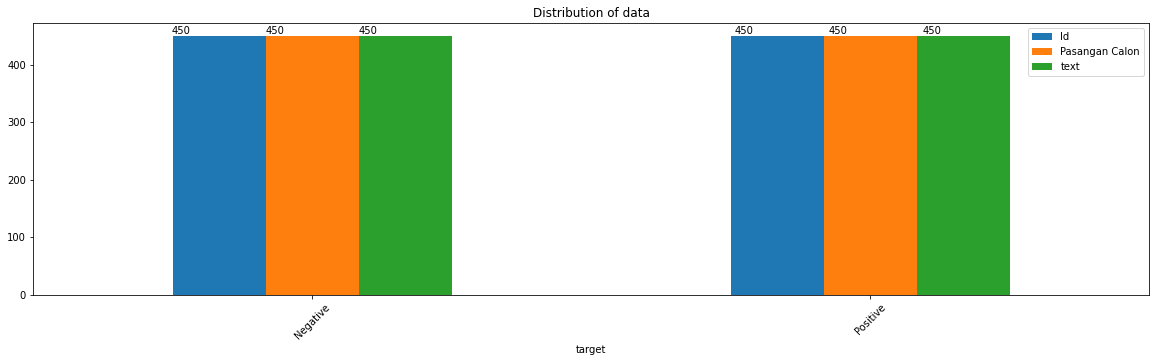

In [16]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=True,figsize=(20, 5))
ax.set_xticklabels(['Negative','Positive'], rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

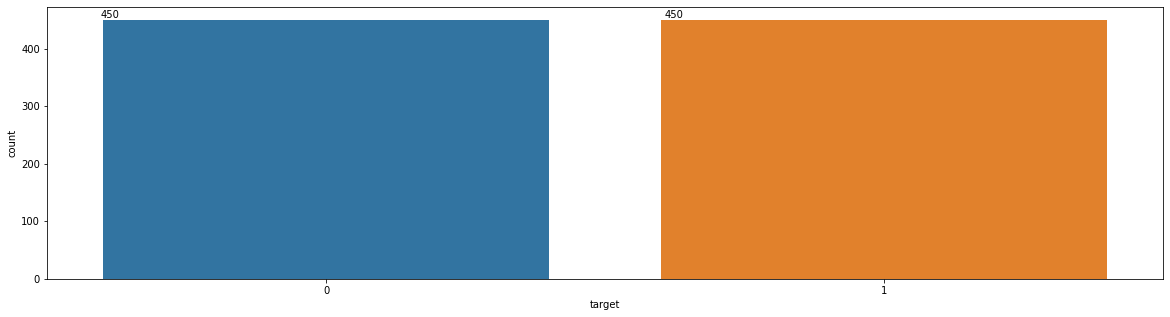

In [17]:
import seaborn as sns
plt.figure(figsize = (20,5))
ax=sns.countplot(x='target', data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

In [18]:
data=df[['text','target']]
data.head()

,text,target
0,Banyak akun kloning seolah2 pendukung #agussil...,0
1,#agussilvy bicara apa kasihan yaa...lap itu ai...,0
2,Kalau aku sih gak nunggu hasil akhir QC tp lag...,0
3,Kasian oh kasian dengan peluru 1milyar untuk t...,0
4,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,0


In [19]:
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


0    450
1    450
Name: target, dtype: int64

In [20]:
data['target'].unique()

array([0, 1])

In [21]:
data_pos = data[data['target'] == 1]
data_pos.head()

,text,target
150,Doa ku.. Semoga suaranya mas Agus-Sylvi benera...,1
151,"Terima kasih mas @AgusYudhoyono, karenamu anak...",1
152,KETEMU DI ISTIQLAL Bangga Pernah Jadi Bagian D...,1
153,"Tersingkir dari kancah pilkada DKI, rupanya ad...",1
154,"Dalam Pilkada DKI, AHY juga mampu menunjukkan ...",1


In [22]:
data_neg = data[data['target'] == 0]
data_neg.head()

,text,target
0,Banyak akun kloning seolah2 pendukung #agussil...,0
1,#agussilvy bicara apa kasihan yaa...lap itu ai...,0
2,Kalau aku sih gak nunggu hasil akhir QC tp lag...,0
3,Kasian oh kasian dengan peluru 1milyar untuk t...,0
4,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,0


In [23]:
data_pos = data_pos.iloc[:]
data_neg = data_neg.iloc[:]
dataset = pd.concat([data_pos, data_neg])
dataset.head()

,text,target
150,Doa ku.. Semoga suaranya mas Agus-Sylvi benera...,1
151,"Terima kasih mas @AgusYudhoyono, karenamu anak...",1
152,KETEMU DI ISTIQLAL Bangga Pernah Jadi Bagian D...,1
153,"Tersingkir dari kancah pilkada DKI, rupanya ad...",1
154,"Dalam Pilkada DKI, AHY juga mampu menunjukkan ...",1


In [24]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].sample(5)

104    harusnya rakyat menangis melihat #ahy kalah. b...
725    dan nginulpun terdiam <face without mouth> . #...
283    diberi nikmat bersyukur, diberi ujian bersabar...
543    lagi nongkrong ada yang masang karangan bunga....
878    #garudaindonesia #indonesia #motivator #motiva...
Name: text, dtype: object

In [25]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize 
 

stop_factory = StopWordRemoverFactory().get_stop_words()
stop_factory[:5]

['yang', 'untuk', 'pada', 'ke', 'para']

In [26]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_factory])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].sample(5)

210                    salam kaum muda. hormat tua. #ahy
649    trus menyalahkan #aniessandi .... sebuah sikap...
204                                  #ahy#demi.indonesia
473    warga bekasi-tangerang-bogor-depok dihimbau me...
178     pilkada rasa pilkades kata mas @panca66 ahy rame
Name: text, dtype: object

In [27]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].sample(5)

40     hellloooo suara rakyat ngerti suara rakyat buk...
351    buahahahhaha emang siapa merayakan gak penduku...
562    pak anies sepertinya semakin banyak respon neg...
349    lebih mulia buruh sidoarjo buruh demo bakar2 k...
101    demokrat ahok gerindra tantangan bermain polit...
Name: text, dtype: object

In [28]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

150    doa ku semoga suaranya mas agussylvi beneran b...
151    terima kasih mas agusyudhoyono karenamu anak m...
152    ketemu istiqlal bangga pernah jadi bagian agus...
153    tersingkir kancah pilkada dki rupanya cara men...
154    pilkada dki ahy mampu menunjukkan kualitasnya ...
Name: text, dtype: object

In [29]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

150    doa ku semoga suaranya mas agussylvi beneran b...
151    terima kasih mas agusyudhoyono karenamu anak m...
152    ketemu istiqlal bangga pernah jadi bagian agus...
153    tersingkir kancah pilkada dki rupanya cara men...
154    pilkada dki ahy mampu menunjukkan kualitasnya ...
Name: text, dtype: object

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

150    doa ku semoga suaranya mas agussylvi beneran b...
151    terima kasih mas agusyudhoyono karenamu anak m...
152    ketemu istiqlal bangga pernah jadi bagian agus...
153    tersingkir kancah pilkada dki rupanya cara men...
154    pilkada dki ahy mampu menunjukkan kualitasnya ...
Name: text, dtype: object

In [31]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

150    doa ku semoga suaranya mas agussylvi beneran b...
151    terima kasih mas agusyudhoyono karenamu anak m...
152    ketemu istiqlal bangga pernah jadi bagian agus...
153    tersingkir kancah pilkada dki rupanya cara men...
154    pilkada dki ahy mampu menunjukkan kualitasnya ...
Name: text, dtype: object

In [32]:
import nltk

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lm = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


150    doa ku semoga suaranya mas agussylvi beneran b...
151    terima kasih mas agusyudhoyono karenamu anak m...
152    ketemu istiqlal bangga pernah jadi bagian agus...
153    tersingkir kancah pilkada dki rupanya cara men...
154    pilkada dki ahy mampu menunjukkan kualitasnya ...
Name: text, dtype: object

In [33]:
X=dataset.text
X.sample(5)
y=dataset.target
y.sample(5)

783    1
31     0
227    1
668    0
199    1
Name: target, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((630,), (270,), (630,), (270,))

In [35]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  8630


In [36]:
X_train = vectoriser.transform(X_train)
X_train

<630x8630 sparse matrix of type '<class 'numpy.float64'>'
	with 13736 stored elements in Compressed Sparse Row format>

In [37]:
X_test  = vectoriser.transform(X_test)
X_test

<270x8630 sparse matrix of type '<class 'numpy.float64'>'
	with 2549 stored elements in Compressed Sparse Row format>

In [38]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} : {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.90      0.45      0.60       135
           1       0.63      0.95      0.76       135

    accuracy                           0.70       270
   macro avg       0.77      0.70      0.68       270
weighted avg       0.77      0.70      0.68       270



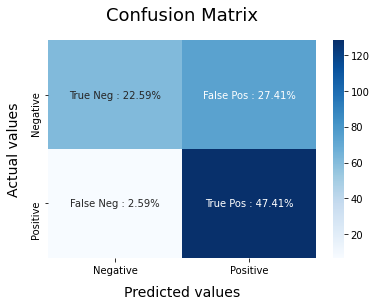

In [39]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

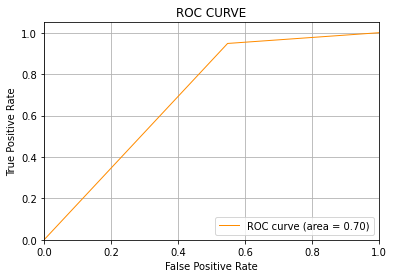

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       135
           1       0.77      0.75      0.76       135

    accuracy                           0.76       270
   macro avg       0.76      0.76      0.76       270
weighted avg       0.76      0.76      0.76       270



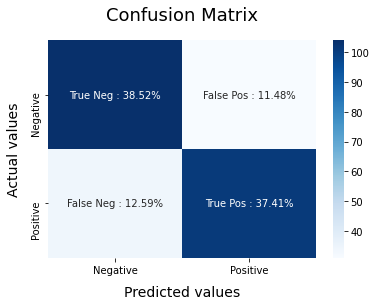

In [41]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

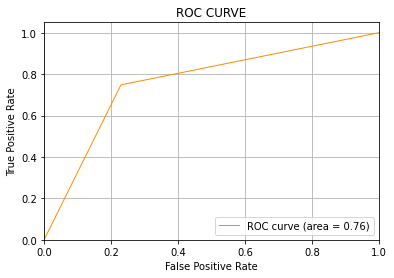

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       135
           1       0.77      0.75      0.76       135

    accuracy                           0.76       270
   macro avg       0.76      0.76      0.76       270
weighted avg       0.76      0.76      0.76       270



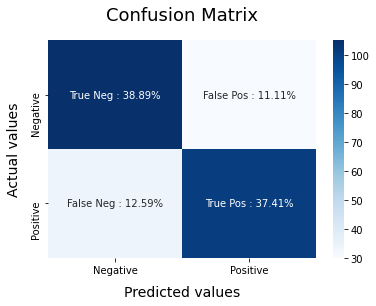

In [43]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

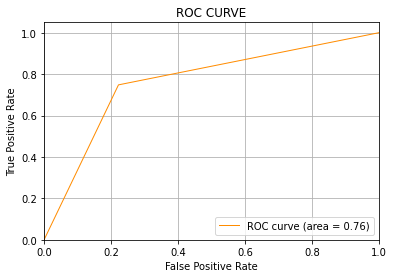

In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()

No. of feature_words:  25040
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        45
           1       0.82      0.80      0.81        45

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



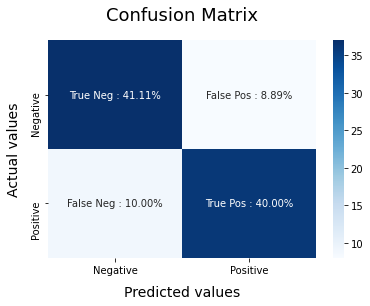

In [45]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

import warnings

from sklearn.neural_network import MLPClassifier

from sklearn.exceptions import ConvergenceWarning

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

vectoriser = TfidfVectorizer(ngram_range=(1,4), max_features=50000,sublinear_tf=True, max_df=0.5)
vectoriser.fit(X_train)

print('No. of feature_words: ', len(vectoriser.get_feature_names()))

# print(vectoriser.get_feature_names())

X_train = vectoriser.transform(X_train)
X_train

# print(X_train[0])

X_test = vectoriser.transform(X_test)
X_test

param = {'solver': 'adam', 'learning_rate_init': 1}

NeuralMLP = MLPClassifier(random_state=0, max_iter=1000)

NeuralMLP.fit(X_train, y_train)

model_Evaluate(NeuralMLP)

y_pred4 = NeuralMLP.predict(X_test)



No. of feature_words:  22528
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        90
           1       0.78      0.86      0.81        90

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

hello


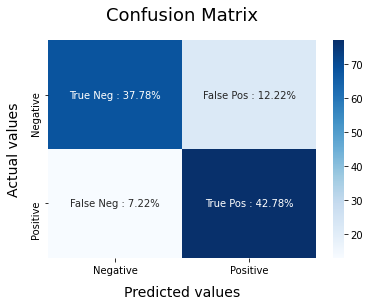

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

vectoriser = TfidfVectorizer(ngram_range=(1,4), max_features=50000,sublinear_tf=True, max_df=0.5)
vectoriser.fit(X_train)

print('No. of feature_words: ', len(vectoriser.get_feature_names()))

# print(vectoriser.get_feature_names())

X_train = vectoriser.transform(X_train)
X_train

# print(X_train[0])

X_test = vectoriser.transform(X_test)
X_test

PAClass = PassiveAggressiveClassifier(max_iter=1000, random_state=42, tol=1e-3)

PAClass.fit(X_train, y_train)

model_Evaluate(PAClass)

y_pred5 = PAClass.predict(X_test)
print("hello")